-다중분류
  - 보스턴 집값, 지역, 집주인 나이를 예측

- 회귀, 분류는 직접예측이냐, 어떤 범주에 들어가느냐하는 문제
  - 신경망의 출력을 그대로 사용하면 회귀, 출력을 확률 분포로 바꿔주면 분류

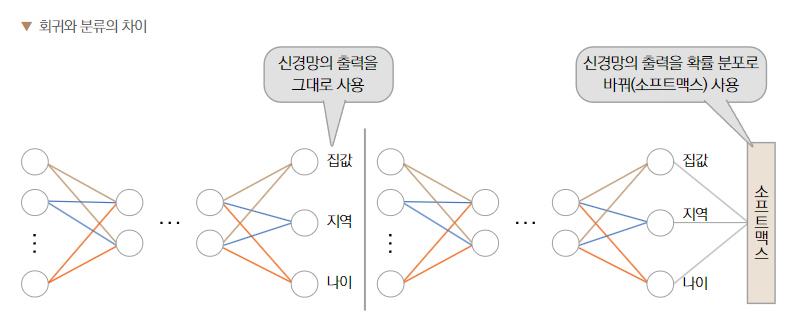

손글씨 예측하기

In [1]:
# 데이터
import matplotlib.pyplot as plt
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

In [2]:
# 학습용 데이터와 평가용 데이터 분리
training_data = MNIST(root='./', train=True, download=True, transform = ToTensor() )
test_data = MNIST(root='./', train=False, download=True, transform = ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 177162177.83it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 110424515.79it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40093983.47it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 20137979.67it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
training_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
import matplotlib.pyplot as plt

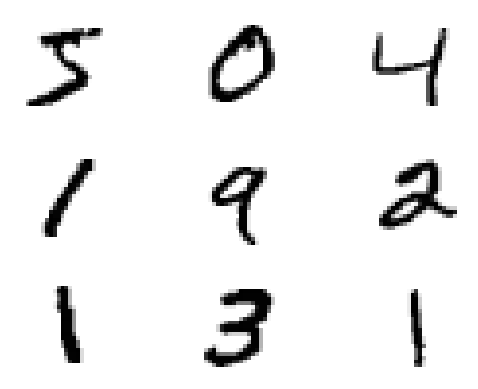

In [5]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(training_data.data[i],cmap='gray_r')
  plt.axis('off')
plt.show()


- 데이터 로더
  - 데이터 객체를 넘겨주면 우리가 원하는 배치 크기, 셔플 여부등을 간단하게 설정

In [6]:
from torch.utils.data.dataloader import DataLoader
train_loader = DataLoader(training_data, batch_size=32,shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle = False)

In [7]:
for data,target in train_loader:
  print(data.shape, target.shape)
  break

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [8]:
data,target = next(iter(train_loader))
data.shape, target.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

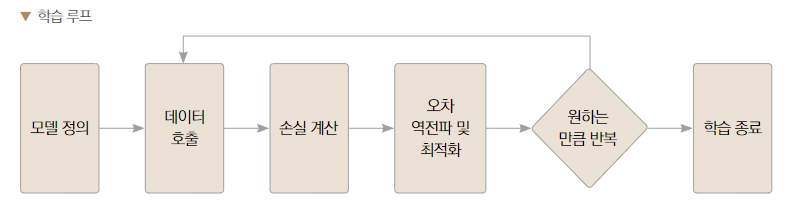

2차원을 1차원으로 변경

In [9]:
import torch
import torch.nn as nn

from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else 'cpu'

In [10]:
model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.Softmax(dim=1)  # 배치크기, 출력형태   차수를 1로설정해서 출력데이터에 확률분포를 적용
)
model.to(device)

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)
for epoch in range(20):
  for data, label in train_loader:
    optim.zero_grad()
    data = torch.reshape(data, (-1, 784)).to(device)
    preds = model(data)
    loss = nn.CrossEntropyLoss()(preds, label.to(device))  # 손실계산
    loss.backward()  # 오차 역전파
    optim.step()     # 최적화 진행
  print(f"epoch : {epoch+1} loss : {loss.item()}")

# 필요하면 저장
torch.save(model.state_dict(), 'MNIST.pth')

epoch : 1 loss : 1.624380111694336
epoch : 2 loss : 1.524456262588501
epoch : 3 loss : 1.5265171527862549
epoch : 4 loss : 1.4875361919403076
epoch : 5 loss : 1.4725991487503052
epoch : 6 loss : 1.4612394571304321
epoch : 7 loss : 1.5847326517105103
epoch : 8 loss : 1.5234981775283813
epoch : 9 loss : 1.4891096353530884
epoch : 10 loss : 1.5181087255477905
epoch : 11 loss : 1.4900444746017456
epoch : 12 loss : 1.5186700820922852
epoch : 13 loss : 1.4868794679641724
epoch : 14 loss : 1.4612598419189453
epoch : 15 loss : 1.461153268814087
epoch : 16 loss : 1.4612451791763306
epoch : 17 loss : 1.4611700773239136
epoch : 18 loss : 1.4618245363235474
epoch : 19 loss : 1.5219926834106445
epoch : 20 loss : 1.461150884628296


In [11]:
# 성능평가
# 모델 가중치 불러오기
model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.Softmax(dim=1)  # 배치크기, 출력형태   차수를 1로설정해서 출력데이터에 확률분포를 적용
)
model.load_state_dict(torch.load('MNIST.pth', map_location=device))

<All keys matched successfully>

In [14]:
num_corr = 0 # 분류에 성공한 개수
with torch.no_grad():  # 기울기를 계산하지 않음
  for data, label in test_loader:
    data = torch.reshape(data, (-1, 784)).to(device)
    output = model(data)
    preds = output.max(1)[1]  # max(1) 각 리스트의 최대값과 인덱스를 반환
    # 올바르게 분류한 개수
    corr = preds.eq(label.to(device)).sum().item()  # item() 은 텐서의 값을 반환
    num_corr += corr
  print(f'accuracy:{num_corr / len(test_data)}')

accuracy:0.9706


신경망 3총사 - 입문용
  - CNN, ResNet, RNN

CNN 과 VGG

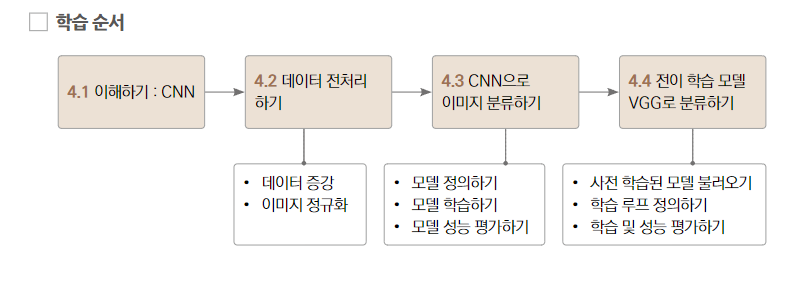

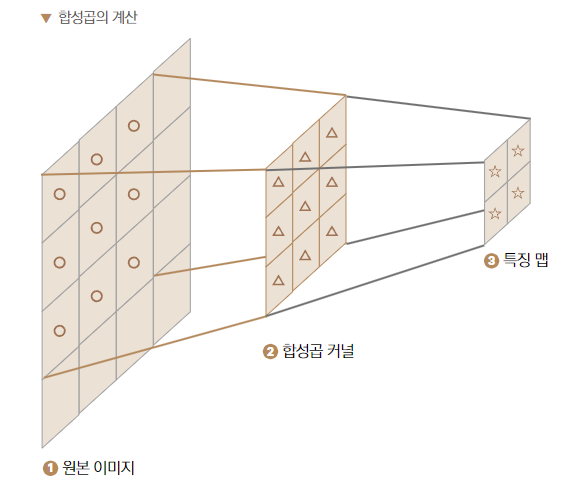

- VGG
  - 3x3 크기의 커널을 이용해서 가중치 개수를 줄인다

- ResNet
  - 층이 깊어질수록 역전파가 되는 오차가 작아지는 문제를 어느정도 해결
  - CNN 모델에서 가장 많이 사용하는 참조모델

- Inception
  - 3x3 커널을 여러번 중첩해서 크기가 큰 커널을 사용 , 큰 키기의 커널보다 적은수의 가중치로 비슷한 효과를 얻는다    

CIFAR10

In [15]:
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

In [16]:
training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform=ToTensor()
)

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform=ToTensor()
)

100%|██████████| 170498071/170498071 [00:03<00:00, 48523772.10it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [17]:
training_data.data.shape, test_data.data.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

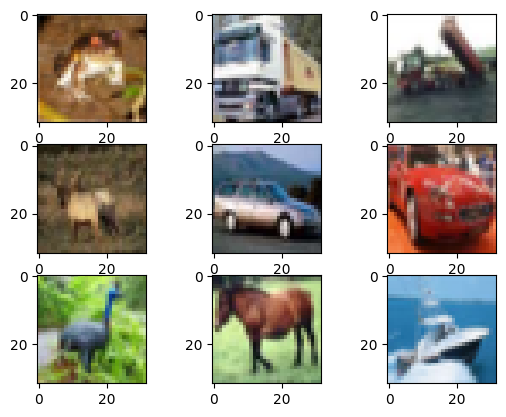

In [18]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(training_data.data[i])
plt.show()

데이터 증강
  - 데이터가 부족하거나 오버피팅을 피하는 기법
  - 데이터를 의도적으로 수정해서 더 많은 데이터를 확보
  - 그림을 뒤집고, 색을 바꾸고 하는 등의 수정으로 이미지 하나를 여러개 만듦
  - 이렇게하면 이미지 크기가 달라진다. 그래서 이미지의 크기에 변화가 없도록 패딩기법을 사용해서 잘라낸 부분을 0으로 채운다

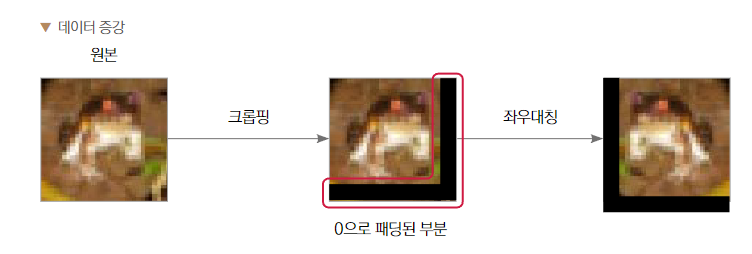

In [19]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

100%|██████████| 170498071/170498071 [00:03<00:00, 48823470.50it/s]


Extracting ./test/cifar-10-python.tar.gz to ./test
Files already downloaded and verified
(50000, 32, 32, 3) (10000, 32, 32, 3)


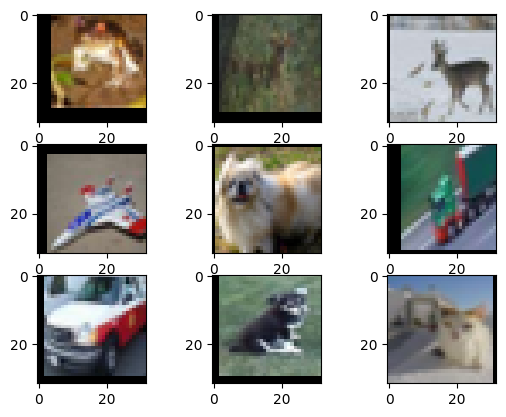

In [20]:
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32,32), padding=4), # 랜덤으로 이미지 일부 제거 후 패딩
    RandomHorizontalFlip(p=0.5) # y축 기준으로 대칭
])
training_data2 = CIFAR10(
    root = './test',
    train = True,
    download = True,
    transform=transforms
)

test_data2 = CIFAR10(
    root = './test',
    train = False,
    download = True,
    transform=transforms
)

print(training_data2.data.shape, test_data2.data.shape)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(transforms( training_data2.data[i*10]))
plt.show()

이미지 정규화
  - 데이터의 분포를 정규분포의 형태로 바꿔주는 것
  - 평균이 0, 표준편차가 1
  - R G B
    - 편형된 값으로 색상을 표현

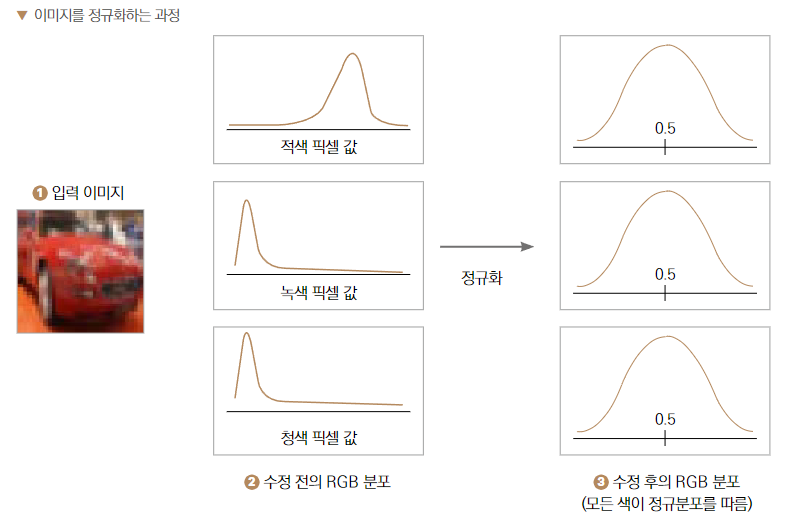

In [21]:
training_data2.data.shape

(50000, 32, 32, 3)

In [22]:
import numpy as np
np.mean(training_data2.data, axis =(0,1,2) ) / 255.0, np.std(training_data2.data, axis =(0,1,2) ) / 255.0

(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

Files already downloaded and verified
Files already downloaded and verified
(50000, 32, 32, 3) (10000, 32, 32, 3)


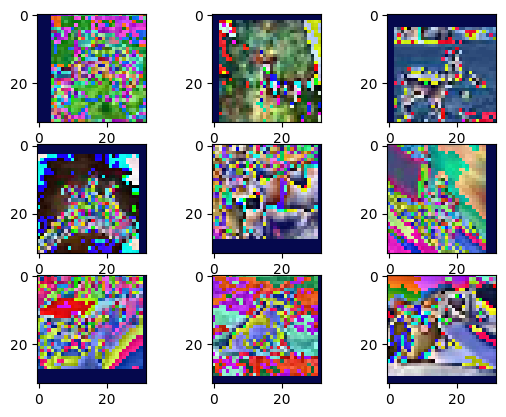

In [23]:
from torchvision.transforms import Normalize
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32,32), padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    Normalize(mean=(0.49139968, 0.48215841, 0.44653091), std=(0.24703223, 0.24348513, 0.26158784)),
    T.ToPILImage()
])

training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform=transforms
)

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform=transforms
)

print(training_data.data.shape, test_data.data.shape)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(transforms( training_data.data[i*10]))
plt.show()

CNN으로 이미지 분류
  - Sequencital 을 사용하면 층을 쌓기만한다.. 간단한 신경망에는 좋은나
  - 커스터마이징을 하려면 nn.Module 을 사용

블럭단위로 개발

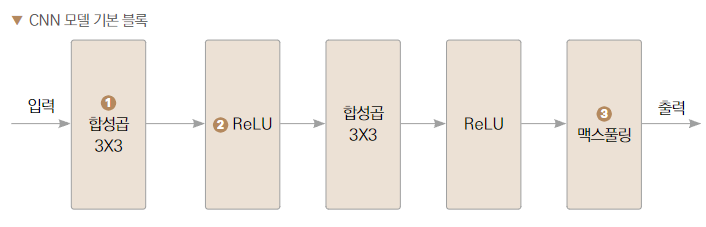

기본 블럭을 만들어서 이것을 반복적으로 사용해서 CNN을 만든다

In [24]:
# 기본블럭
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
  def __init__(self, in_channels, out_channels, hidden_dim):
    # nn.Module 요소를 상속
    super(BasicBlock, self).__init__()
    # 합성곱층 정의
    self.conv1 = nn.Conv2d(in_channels, hidden_dim,kernel_size=3,padding=1)
    self.conv2 = nn.Conv2d(hidden_dim, out_channels,kernel_size=3,padding=1)
    self.relu = nn.ReLU()

    # stride 커널의 이동거리
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool(x)
    return x

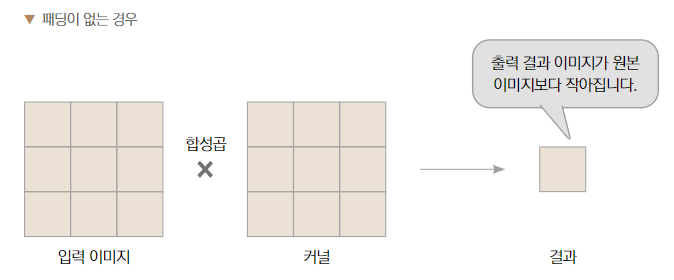

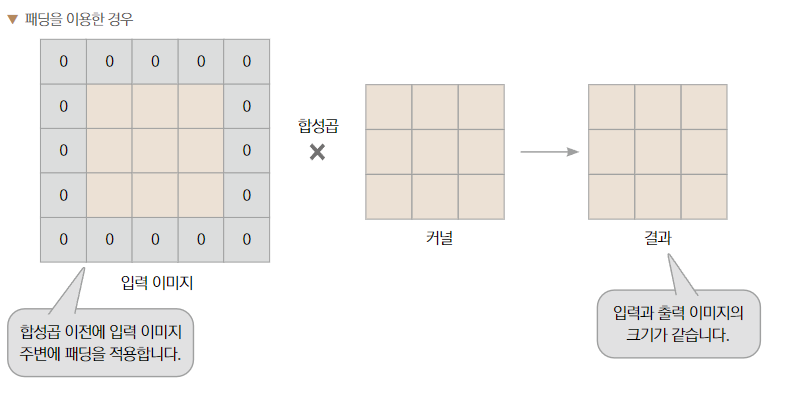

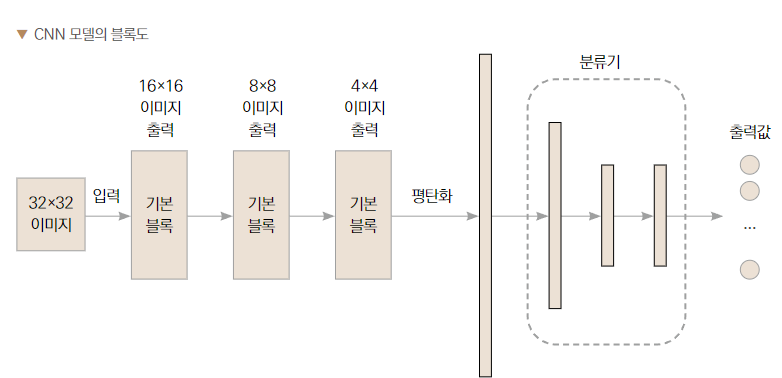

VGG 모델 정의

In [33]:
class CNN(nn.Module):
  def __init__(self, num_classes):
    super(CNN, self).__init__()
    # 합성곱 기본 블럭 정의
    self.block1 = BasicBlock(in_channels=3, out_channels=32, hidden_dim=16)
    self.block2 = BasicBlock(in_channels=32, out_channels=128, hidden_dim=64)
    self.block3 = BasicBlock(in_channels=128, out_channels=256, hidden_dim=128)

    # 분류기 정의
    self.fc1 = nn.Linear(in_features=4096 , out_features = 2048)
    self.fc2 = nn.Linear(in_features=2048 , out_features = 1024)
    self.fc3 = nn.Linear(in_features=1024 , out_features = num_classes)

    # 분류기의 활성화 함수
    self.relu = nn.ReLU()
  def forward(self,x):
    x = self.block1(x)
    x = self.block2(x)
    x = self.block3(x)
    x = torch.flatten(x, start_dim=1)  #2 차원 특징맵을 1차원으로
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    return x

In [37]:
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import Normalize
from torch.optim.adam import Adam
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([
    RandomCrop((32,32), padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    Normalize(mean=(0.49139968, 0.48215841, 0.44653091), std=(0.24703223, 0.24348513, 0.26158784)),
])

training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform=transforms
)

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform=transforms
)
train_loader = DataLoader(training_data,batch_size=32, shuffle = True)
test_loader = DataLoader(test_data,batch_size=32, shuffle = False)

model = CNN(10)
model.to(device)

# 학습률 정의
lr = 1e-3

# 최적화 기법 정의
optim = Adam(model.parameters(), lr=lr)

# 학습루프
for epoch in range(2):
  for data, label in train_loader:
    optim.zero_grad() # 기울기 초기화

    preds = model(data.to(device)) # 모델의 예측

    # 오차역전파와 최적화
    loss = nn.CrossEntropyLoss()(preds, label.to(device))
    loss.backward()
    optim.step()
  if epoch ==0 or epoch%10 == 0:
    print(f'epoch{epoch+1} loss:{loss.item()}')

# 모델 저장
torch.save(model.state_dict(), 'CIFAR.pth')

Files already downloaded and verified
Files already downloaded and verified
epoch1 loss:1.514053463935852
